## Reinforcement Learning (Final Assignment)
#### Team 29
#### Kees Wierenga
#### Tamara Tataru

In [24]:
import numpy as np
import random
import gym
import time
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

## Environment - Taxi-v3
### SARSA Algorithm

### Initialize Q-Table and count array

In [26]:
def initialize_Q_table(env):
    """
    For the given environment, the possible actions are integers from 0-5, 
    and the possible states are integers from 0-499.
    Therefore, the Q-Value of, for example, taking action 3 in state 156 can be found as Q[156, 3]
    """
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    return Q

def init_count_arary(env):
    return np.zeros([env.observation_space.n, env.action_space.n])


### Define UCB policy

In [27]:
def get_UCB_action(Q, state, N, env, step, c):
    argMax = 0 
    iMax = 0 
    for i in range (env.env.action_space.n):
        if N[state, i] == 0 or step ==0:
            temp = float('inf')
        else:         
            temp = Q[state, i] + (c * np.sqrt(np.log(step) / N[state, i]))
        if temp > argMax:
            iMax = i
            argMax = temp
    N[state, iMax] = N[state,iMax] + 1 
    return iMax


### Define steps to follow by agent during an episode

In [28]:
def execute_episode(Q, N, max_timesteps, c):
    
    rewards = list()
    
    state, _ = env.reset()
    action = get_UCB_action(Q, state,N, env, 0, c )
    
    for s in range(1,max_timesteps):
        
        # Pick action following epsilon-greedy policy
        new_state, reward, done, info, _ = env.step(action)
        new_action = get_UCB_action(Q, state,N, env, s, c )
        # Perform action and receive new state S' and reward R
        
        rewards.append(reward)
        
        # Update Q-values 
        old_value = Q[state, action]
        
        new_value = step_size * (reward + discount_factor * Q[(new_state,new_action)]-old_value)
        Q[state, action] += new_value
        
        state = new_state
        action = new_action
        
        if done:
            break
            
    return Q, sum(rewards)
        

### Train Agent

In [29]:
step_size = 0.05
discount_factor = 0.9
n_episodes = 60000
n_steps = 500

env = gym.make('Taxi-v3').env
rewards_history = list()

def train_q_learning(c):
    
    Q = initialize_Q_table(env)
    N = init_count_arary(env)
    for episode in range(n_episodes):
        print(f'Training on Episode {episode+1}... c: {c}', end="\r")

        Q, reward = execute_episode(Q, N, n_steps, c)
        
        rewards_history.append(reward)
    
    return Q, rewards_history
    

In [30]:
trained_Q, rewards_history = train_q_learning(50) 



### Evaluate Agent's performance

#### Rewards history

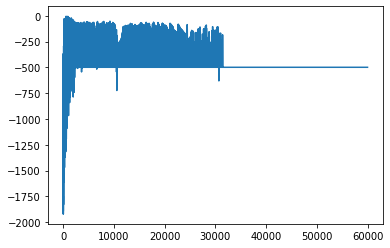

In [31]:
import matplotlib.pyplot as plt

plt.plot(range(n_episodes), rewards_history)
plt.show()

#### Visualization of the Trained Agent

KeyboardInterrupt: 

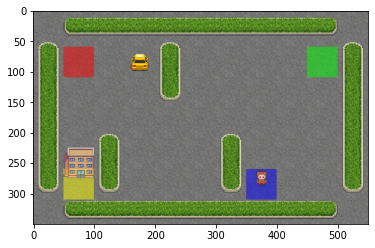

In [32]:
env = gym.make('Taxi-v3', render_mode='rgb_array')
state, _ = env.reset()
done = False

while not done:
    
    plt.imshow(env.render())
    display.display(plt.gcf())    
    display.clear_output(wait=True)
    # Pick random action
    action = np.argmax(trained_Q[state])
    state, reward, done, _, __ = env.step(action)
env.close()

In [34]:
def execute_episodes_on_trained_agent(Q, n_episodes):
    
    episode_rewards = dict()
    for episode in range(n_episodes):
        print(f'Executing Episode {episode+1}...')
        
        # Initialize historics
        rewards = list()

        state, _ = env.reset()

        done = False
        n_steps = 0

        while not done and n_steps < 100:

            action = np.argmax(Q[state])

            state, reward, done, _, _ = env.step(action)
            rewards.append(reward)
            n_steps += 1
            
        episode_rewards[episode] = (sum(rewards), n_steps)
        print(f'Episode {episode+1} took {n_steps} steps, and got a reward of {sum(rewards)}\n')

    return episode_rewards

In [35]:
n_test_episodes = 10
trained_agent_rewards = execute_episodes_on_trained_agent(trained_Q, n_test_episodes)

avg_steps = sum([episode_info[1] for episode_info in trained_agent_rewards.values()])/n_test_episodes
avg_reward = sum([episode_info[0] for episode_info in trained_agent_rewards.values()])/n_test_episodes

print('\n\n')
print('Average number of timesteps per episode: ', avg_steps)
print('Average reward per episode: ', avg_reward)

Executing Episode 1...
Episode 1 took 100 steps, and got a reward of -100

Executing Episode 2...
Episode 2 took 100 steps, and got a reward of -100

Executing Episode 3...
Episode 3 took 100 steps, and got a reward of -100

Executing Episode 4...
Episode 4 took 100 steps, and got a reward of -100

Executing Episode 5...
Episode 5 took 100 steps, and got a reward of -100

Executing Episode 6...
Episode 6 took 100 steps, and got a reward of -100

Executing Episode 7...
Episode 7 took 100 steps, and got a reward of -100

Executing Episode 8...
Episode 8 took 100 steps, and got a reward of -100

Executing Episode 9...
Episode 9 took 100 steps, and got a reward of -100

Executing Episode 10...
Episode 10 took 100 steps, and got a reward of -100




Average number of timesteps per episode:  100.0
Average reward per episode:  -100.0
